In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
import os


In [2]:
os.getcwd()

'/Users/markbrackenrig/Documents/2021_FEB/ADSI/assignment_2/notebooks'

In [3]:
#Change directory to parent directory
os.chdir('../')
from src.data import make_dataset

In [4]:
os.listdir('data/raw')

['beer_reviews.csv', '.gitkeep']

In [5]:
data = pd.read_csv('data/raw/beer_reviews.csv')

In [6]:
data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [7]:
data.beer_style.unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [8]:
drop_columns = ['brewery_id','review_time','review_profilename','beer_name', 'beer_beerid', 'beer_abv']

In [9]:
data.drop(columns = drop_columns, inplace=True)

In [10]:
data["brewery_name"] = data["brewery_name"].str.lower()

In [11]:
data["brewery_name"] = data['brewery_name'].str.replace('[^\w\s]','')

<ipython-input-11-f36baf82d140>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["brewery_name"] = data['brewery_name'].str.replace('[^\w\s]','')


<AxesSubplot:>

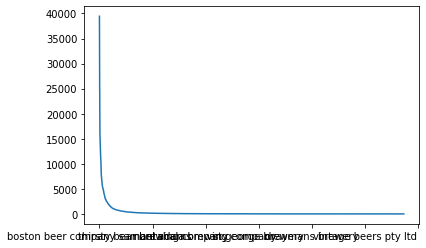

In [37]:
data.brewery_name.value_counts().plot()

In [56]:
#The vast majoirty come from large breweries, lets just use these for the one hot encodings and have an igore category
data.brewery_name.value_counts().nlargest(1000).index.tolist()

['boston beer company samuel adams',
 'dogfish head brewery',
 'stone brewing co',
 'sierra nevada brewing co',
 'bells brewery inc',
 'rogue ales',
 'founders brewing company',
 'victory brewing company',
 'lagunitas brewing company',
 'avery brewing company',
 'southern tier brewing company',
 'anheuserbusch',
 'great divide brewing company',
 'goose island beer co',
 'three floyds brewing co  brewpub',
 'unibroue',
 'brooklyn brewery',
 'new belgium brewing',
 'weyerbacher brewing co',
 'tröegs brewing company',
 'flying dog brewery',
 'russian river brewing company',
 'north coast brewing co',
 'new glarus brewing company',
 'great lakes brewing company',
 'deschutes brewery',
 'smuttynose brewing company',
 'samuel smith old brewery tadcaster',
 'anchor brewing company',
 'brewery ommegang',
 'harpoon brewery',
 'matt brewing company',
 'magic hat brewing company',
 'bear republic brewing co',
 'left hand brewing company',
 'boulevard brewing co',
 'mikkeller aps',
 'allagash brew

In [11]:
X,y = make_dataset.separate_target(data,'beer_style')

In [12]:
X.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06
mean,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00
std,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [13]:
X.shape

(1586614, 6)

In [14]:
X.columns

Index(['brewery_name', 'review_overall', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste'],
      dtype='object')